---

```
CSC 84030: Big Data Analytics
P2 (35 Points)
Due: Oct 25th, 11:59 pm
```
---


![yelp image](https://seeklogo.com/images/Y/yelp-logo-AB0C3B25D1-seeklogo.com.png)
###Yelp Data Analysis

For this Project we will analyze the Yelp Dataset. You can get a Copy of the Dataset from [here](https://www.yelp.com/dataset/). The Dataset contains the Following files:
- yelp_academic_dataset_business.json : Contains information about each business
- yelp_academic_dataset_checkin.json : Contains user checkin Information
- yelp_academic_dataset_review.json : Contains all the reviews
- yelp_academic_dataset_tip.json : Contains Tip information
- yelp_academic_dataset_user.json : Contains User information

To know more about each dataset please refer to the official [documentation](https://www.yelp.com/dataset/documentation/main).

*Note1: The datasets is relatively large, please upload it to your Google Drive before starting the work*

**Note2: All the solutions to the tasks should be using DataFrame APIs. None of the tasks will require you to convert the DataFrames to RDDs.**

### 1. Getting Started
We will start by setting up the Spark environment and instantiating a Spark Object Instance. You might have to repeat this everytime you start as you are not garaunteed to obtain the same instance every time.


In [25]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("Colab-Spark").config("spark.ui.port", "4050").getOrCreate()

openjdk-8-jdk-headless is already the newest version (8u422-b05-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Businesses Data Analysis**

We will start our analysis with the Business Data. We will create a new DataFrame from the *yelp_academic_dataset_business.json* file. Before you run this block of code make sure that you replace the file path with the file location on your Google Drive. Clicking the Folder Icon on the left should show you the list of folders and *drive* will be listed if you Google Drive is mounted. If not, click on the Google Drive icon on top. Now navigate to the file location in the drive folder and right click and select *copy path* option. You should use this path to replace the current Path in the code block below.

As this is a big dataset, loading it will take some time. Practice Patience! If things went well you should see the schema printed. Get familiar with the schema which will be useful for the next few tasks.


In [27]:
yelp_bussiness_df=spark.read.json('/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_business.json')
yelp_bussiness_df.printSchema()


root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

##2. Data preparation##

The dataset if for multiple cities between countries, to keep the scope of this project manageable we will focus our analysis to a small subset of of the dataset, only cities within New Jersey, yes the Garden State and our neighbor.

You will start by filtering the dataset and selecting only the businesses which are in New Jersey.

**[5 Points] TASK**:

Filter the DataFrame yelp_bussiness_df to only select the businesses in New Jersesy. The filtered DataFrame should be stored under the following variable name:

*yelp_bussiness_df_NJ* - Filtered DataFrame should be assigned to this variable

**Hints**:
- You will find the postal codes useful for this
- Also you might find that the postal codes are not present for all the businesses, so you will have deal with it
- The generation of the final DataFrame might take multiple lines of code and this is applicable to all the tasks that follow.



In [28]:
##FILL IN
nj_postal_codes = [str(i).zfill(5) for i in range(7001, 8904)]  # zip codes of NJ

# Filter the DataFrame to select only businesses with New Jersey's zipcode
yelp_bussiness_df_NJ = (yelp_bussiness_df.filter(
        (yelp_bussiness_df["postal_code"].isNotNull()) &
        (yelp_bussiness_df["postal_code"].isin(nj_postal_codes))
    )
)

### 2. Cities and Reviews

Now that we have all the data for the business in NJ, let us first look the variation in reviews across the cities. To keep things interesting we will limit ourselves only to cities which have more than 2000 reviews across all its business. Pay attention, it is not one business but across all the businesses in that city.

**[2 points] TASK-1:**
  Create a new DataFrame yelp_bussiness_df_NJ_reviews_2000 which contains all the cities which have more than 2000 reviews across all its businesses and their review counts. For this you will use the yelp_bussiness_df_NJ that you created before.

**[3 points] TASK-2:**
  Use the DataFrame yelp_bussiness_df_NJ_reviews_2000 to create a bar plot showing the total number of reviews for different cities in NJ. The plot should be sorted in descending order, with the city with most reviews being the leftmost city. You will use matplotlib for this.


In [29]:
import matplotlib.pyplot as plt
#FILL IN
from pyspark.sql.functions import col, sum as _sum

#sort by city, aggregate based on city, and filter based on condition
yelp_bussiness_df_NJ_reviews_2000 = yelp_bussiness_df_NJ \
    .groupBy("city") \
    .agg(_sum("review_count").alias("total_review_count")) \
    .filter(col("total_review_count") > 2000) \
    .select("city", "total_review_count")

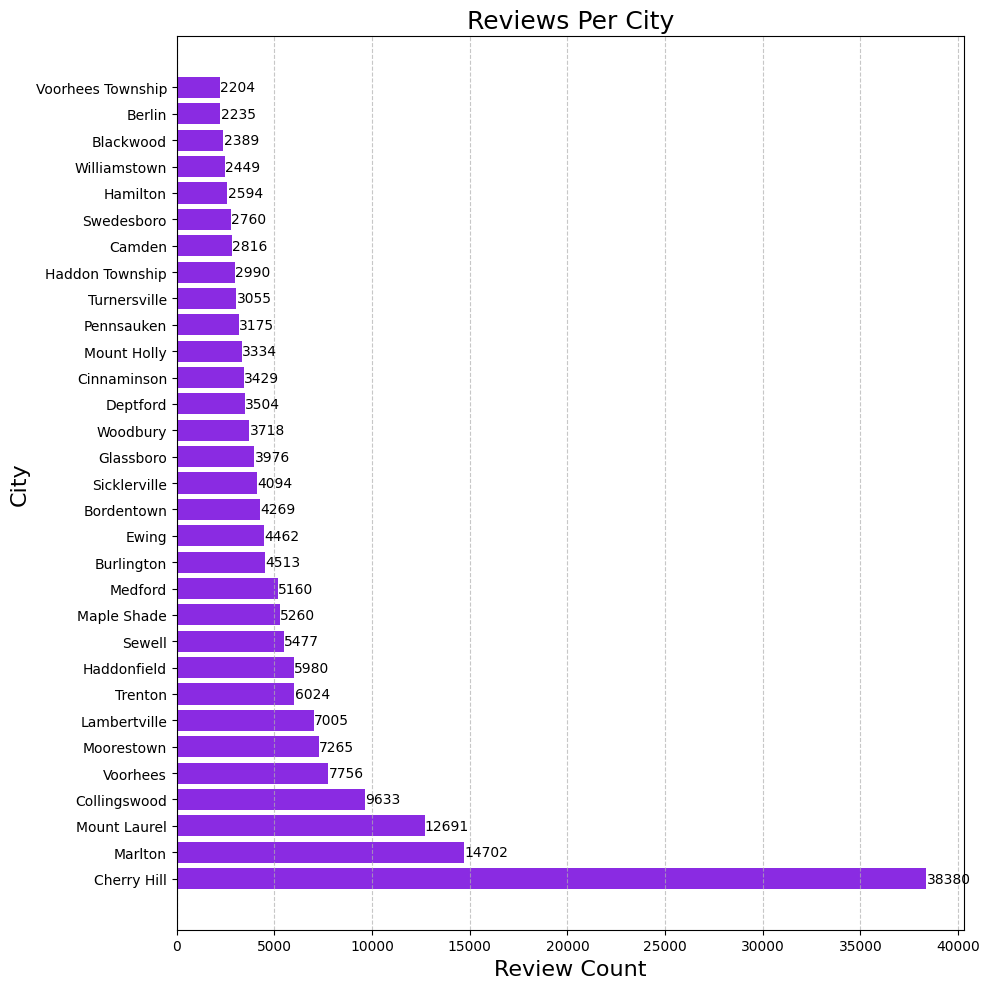

In [30]:
#sort cities in descending order based on review count
yelp_bussiness_df_NJ_reviews_2000 = yelp_bussiness_df_NJ_reviews_2000.orderBy(col("total_review_count").desc())

# Collect city names and total review count as lists
cities = [row['city'] for row in yelp_bussiness_df_NJ_reviews_2000.collect()]
review_counts = [row['total_review_count'] for row in yelp_bussiness_df_NJ_reviews_2000.collect()]

# Plotting
fig = plt.figure(figsize=(10, 10))

bars = plt.barh(cities, review_counts, color='blueviolet')

plt.xlabel('Review Count', fontsize=16)
plt.ylabel('City', fontsize=16)
plt.title('Reviews Per City', fontsize=18)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Add labels to each bar (the number of reviews for each city)
for bar, count in zip(bars, review_counts):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, str(count),
             va='center', fontsize=10)

plt.tight_layout()

plt.show()

**[3 points] TASK-3**
Based on the chart generated above answer the following quetions:
*(You can type in the answers below each question by double clicking this section)*

- Q1. Which city has the most reviews?

 > Cherry Hill (38380)


- Q2. Which city has the least reviews?

 > Voorhees Township (2204)


- Q3. What is the median review count?

 > Sicklerville (16 out of 31 cities)


### 3. Correlation between columns


We will next concern ourselves with a simple question, is there a correlation between the number of stars a business has and the number of reviews that it receives. We discussed about correlation in class. You will find the lecture slides useful here.

We will visualize the correlation by creating a scatter plot between the number of stars (stars column) and the number of reviews (review_count column) for all the businesses in the yelp_bussiness_df_NJ DataFrame.

**[3 points] Task -1** Generate a scatter plot betwen number of stars and the number of reviews for the all the businesses in yelp_bussiness_df_NJ.

*Note: Here you are not doing any aggregation.*



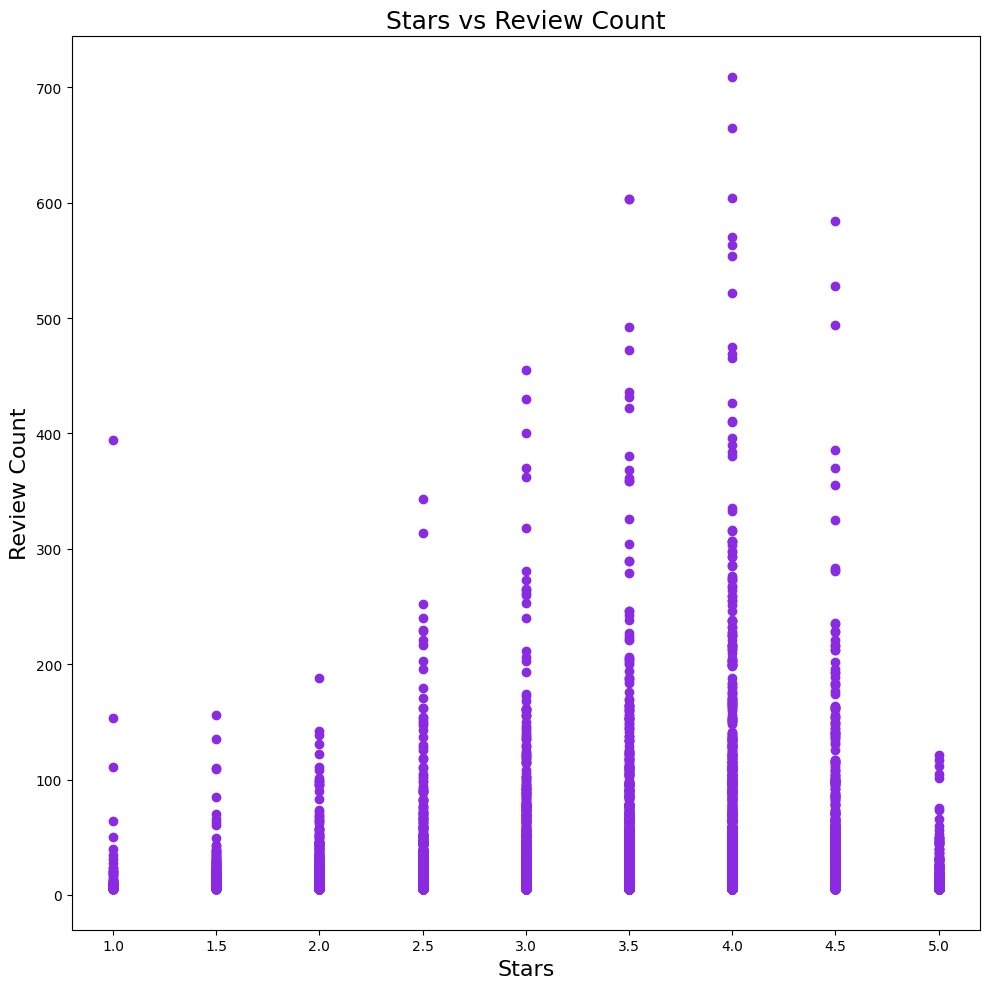

In [31]:
# Collect the star rating and number of reviews as lists
stars = [row['stars'] for row in yelp_bussiness_df_NJ.collect()]
review_counts = [row['review_count'] for row in yelp_bussiness_df_NJ.collect()]

# Plotting the scatter plot
fig = plt.figure(figsize=(10, 10))

plt.scatter(stars, review_counts, color='blueviolet')

plt.xlabel('Stars', fontsize=16)
plt.ylabel('Review Count', fontsize=16)
plt.title('Stars vs Review Count', fontsize=18)

plt.tight_layout()
plt.show()


**[2 points] TASK-2** Compute Pearson Correlation between the number of stars and the number of reviews. Again, you will find the lecture slides useful here.

In [32]:
from scipy.stats import pearsonr

# Collect the star rating and number of reviews as lists
stars = [row['stars'] for row in yelp_bussiness_df_NJ.collect()]
review_counts = [row['review_count'] for row in yelp_bussiness_df_NJ.collect()]

# Compute Pearson correlation coefficient
r, p_value = pearsonr(stars, review_counts)

print(f"Pearson correlation coefficient: {r}")

Pearson correlation coefficient: 0.06224496432658105


**[3 points] TASK-3** Based on the scatter plot you generated and the obtained Pearson Correlation Coefficient answer the following questions:

- Is there correlation between number of starts and review counts? If yes, is the correlation positive or negative?
 > No because a pearson coefficient of 0.06 indicates very little positive or no correlation.

- Does the pearsons correlation coefficient agree with the scatter plot?
  > Yes because the plots are distributed similar to a bar chart. There isn't any trend since the number of reviews vary for businesses with the same star rating.

- Can filtering out the data in anyway lead to better correlation?

  > No because finding a relation between a business review count and the number of stars is not really predictive. The relation is used to observe if a business with lots of reviews have good ratings.

### 4. Reviews Data Analysis

We will shift our focus to reviews. We will start by loading the data and looking into the schema. Similar to the Business data, make sure that you replace the path with the path in your Google Drive folder. Refer to the prior section if you have additional questions.

In [33]:
yelp_reviews_df=spark.read.json("/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_review.json")
print(yelp_reviews_df.printSchema())

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

None


The reviews dataset is bigger than the Business dataset. Thus, we will filter and only retain the reviews that correspond to those businesses in NJ with more than two thousand reviews.

**[3 points] Task-1** Create a new DataFrame called yelp_reviews_df_NJ_cities_reviews_2000 which contains all the reviews for the businesses within NJ with more than 2000 reviews. The dataframe should contain all the columns from the yelp_reviews_df and the following columns from yelp_reviews_df_NJ_cities_reviews_2000:

* City
* latitude
* longitude

Feel Free to create any of the interemediate DataFrames that are necessary.


In [34]:
yelp_bussiness_df_NJ_reviews_2000 = yelp_bussiness_df_NJ \
    .groupBy("city") \
    .agg(_sum("review_count").alias("total_review_count")) \
    .filter(col("total_review_count") > 2000) \
    .select("city", "total_review_count")

#after aggregate, inner join so dataframe can be used to join reviews df
yelp_bussiness_df_NJ_reviews_2000_full = yelp_bussiness_df_NJ \
    .join(yelp_bussiness_df_NJ_reviews_2000, on="city", how="inner") \
    .select("city", "total_review_count", "business_id", "latitude", "longitude")

# Selecting necessary columns for the final DataFrame
yelp_bussiness_df_NJ_reviews_2000_sub = yelp_bussiness_df_NJ_reviews_2000_full.select("city", "latitude", "longitude", "business_id")

#join dfs based on business id
yelp_reviews_df_NJ_cities_reviews_2000 = yelp_reviews_df.join(
    yelp_bussiness_df_NJ_reviews_2000_sub,
    yelp_reviews_df.business_id == yelp_bussiness_df_NJ_reviews_2000_sub.business_id,
    how='inner'
)
#FILL IN

**[5 points] TASK-2 Users, Cities, and Reviews**

We are interested in answering few questions with respect to our users, (*for each answer you will need to write a Spark DataFrame query that will result in the answer*):


1.   (3 points) What is the maximum number of cities visited by a single user, what are those cities?




In [35]:
#FILL IN
from pyspark.sql.functions import countDistinct, max

#dataframe for number of distinct cities visited for each user
yelp_user_visited = yelp_reviews_df_NJ_cities_reviews_2000 \
    .groupBy("user_id") \
    .agg(countDistinct("city").alias("City_Visited"))

max_city_visited_value = yelp_user_visited.agg(max("City_Visited").alias("Max_City_Visited")).collect()[0]["Max_City_Visited"] #get the max value of city visited

max_users = yelp_user_visited.filter(col("City_Visited") == max_city_visited_value) #filter based on max city visited to get user as well

max_users.show()

+--------------------+------------+
|             user_id|City_Visited|
+--------------------+------------+
|zUk_Ww2q1At1QSyRb...|          29|
+--------------------+------------+



In [36]:
max_id_city=yelp_reviews_df_NJ_cities_reviews_2000.join(max_users, on="user_id", how="inner").select("user_id", "city") #use inner join to get one user id

max_id_city_unique = max_id_city.distinct()
max_id_city_unique.show(n=29)

+--------------------+-----------------+
|             user_id|             city|
+--------------------+-----------------+
|zUk_Ww2q1At1QSyRb...|        Glassboro|
|zUk_Ww2q1At1QSyRb...|         Voorhees|
|zUk_Ww2q1At1QSyRb...|     Collingswood|
|zUk_Ww2q1At1QSyRb...|     Mount Laurel|
|zUk_Ww2q1At1QSyRb...|         Deptford|
|zUk_Ww2q1At1QSyRb...|Voorhees Township|
|zUk_Ww2q1At1QSyRb...|          Marlton|
|zUk_Ww2q1At1QSyRb...|      Maple Shade|
|zUk_Ww2q1At1QSyRb...|         Woodbury|
|zUk_Ww2q1At1QSyRb...|      Cherry Hill|
|zUk_Ww2q1At1QSyRb...|        Blackwood|
|zUk_Ww2q1At1QSyRb...|       Moorestown|
|zUk_Ww2q1At1QSyRb...|          Medford|
|zUk_Ww2q1At1QSyRb...|          Trenton|
|zUk_Ww2q1At1QSyRb...|     Sicklerville|
|zUk_Ww2q1At1QSyRb...|       Bordentown|
|zUk_Ww2q1At1QSyRb...|     Williamstown|
|zUk_Ww2q1At1QSyRb...|       Burlington|
|zUk_Ww2q1At1QSyRb...|           Camden|
|zUk_Ww2q1At1QSyRb...|     Turnersville|
|zUk_Ww2q1At1QSyRb...|           Berlin|
|zUk_Ww2q1At1QSy

2.   (2 points) List the top three user ID's with the most number of four star
and above reviews.


In [37]:
#FILL IN
from pyspark.sql.functions import count

yelp_user_4_star=yelp_reviews_df_NJ_cities_reviews_2000.filter(col("stars") >= 4).groupBy("user_id").agg(count("stars").alias("review_count")) #count number of reviews  with more than 4 stars
top_three_users=yelp_user_4_star.orderBy(col("review_count").desc()).limit(3) #show top 3
top_three_users.show()

+--------------------+------------+
|             user_id|review_count|
+--------------------+------------+
|zUk_Ww2q1At1QSyRb...|         377|
|B-s-8VUnuBjGTP3d0...|         236|
|Lb-0y35-vafOkfd9Y...|         224|
+--------------------+------------+



**Folium for Geo-spatial visualization**

Folium is a powerful Python library for creating interactive maps using Leaflet.js. It allows easy plotting of latitude and longitude data and integrates well with Python data analysis workflows. Folium is particularly useful for visualizing geospatial data in an intuitive and interactive manner, making it a great tool for working with maps in Jupyter notebooks or Google Colab.

Key features include:

	•	Simple and interactive map creation.
	•	Support for various types of geographical visualizations (markers, polylines, choropleths, etc.).
	•	Integration with popular geospatial formats such as GeoJSON and TopoJSON.

Check out the official Folium project page for more details:
https://python-visualization.github.io/folium/

Below is an example showing you how to add markers to map using folium

In [38]:
#Install folium if not already installed
!pip install folium

In [39]:
import folium

m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)  # New York City

# Sample data: list of [latitude, longitude, popup text]
locations = [
    [40.7128, -74.0060, 'New York City'],
    [34.0522, -118.2437, 'Los Angeles'],
    [41.8781, -87.6298, 'Chicago']
]

# Add markers to the map
for lat, lon, city in locations:
    folium.Circle(
        location=[lat, lon],
        radius=100,  # Set the radius (in meters)
        color='blue',  # Circle edge color
        fill=True,
        fill_color='cyan',  # Circle fill color
        fill_opacity=0.6,
        popup=""  # Popup text for each city
    ).add_to(m)

m

###5.Visualizing Geo-Spatial clusters.

For our final task, you will plot all the locations with more than 2000 reviews, and observer the distribution of these businesses and make some comments and recommendations based on your observation. You comments should answer the following questions:


*   Which areas on the map have a higher density of most reviewed businesses?
*   Which routes on the map have most highly reviewed businesses?
*   List some of the areas with the least amount of highly reviewed businesses.


**[3 points] TASK-1** Plot the different businesses with more than 2000 reviews from the yelp_reviews_df_NJ_cities_reviews_2000 DataFrame on the map. Make sure you set the center and Zoom level appropriately.

*Note: The latitude and longitude values will contain duplicates, you might want to remove to reduce cluttering and aid visualization*

In [40]:
#FILL IN

import folium

m = folium.Map(location=[39.9970, -74.9928], zoom_start=10) # cinnaminson

locations=yelp_reviews_df_NJ_cities_reviews_2000.select("latitude", "longitude").distinct().collect()

# Add markers to the map
for lat, lon in locations:
    folium.Circle(
        location=[lat, lon],
        radius=10,  # Set the radius (in meters)
        color='red',  # Circle edge color
        fill=True,
        fill_color='orange',  # Circle fill color
        fill_opacity=0.6,
        popup=""  # Popup text for each city
    ).add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

**[3 points] Task-2** Write your observations that you made based on the generated plot above. Note, your observations should cover some of the questions raised in Taks-1


> Businesses with high review counts are clustered in the West New Jersey area (close to Philadelphia).
NJ 73, NJ 38, NJ 70, seems to contain the largest clusters. This might be due to the Cherry Hill area containing the most reviews and that they have malls along the route.
Swedesboro, Mount Holly, and Lambertville appear to be the smallest cluster on the map.

#### **Submission Instruction:**

#### Click File -> Download -> Download .ipynb, rename it as P2_(last_name).ipynb and upload the downloaded file to Blackboard.